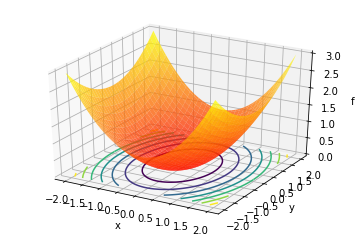

In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

A,B = 1/2, 1/4                                # coefficients of objective functions
x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of y

f = lambda x, y: A*x**2 + B*y**2

ax_x = np.linspace(x_min, x_max, 101)
ax_y = np.linspace(y_min, y_max, 101)
x, y = np.meshgrid(ax_x,ax_y)

z = f(x,y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='autumn', alpha=0.75)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f')

plt.show()

In [9]:
# variable stepwidth

# split f into its x and y components
def g(x):
    return A*x**2

def h(y):
    return B*y**2

def derivative1(g,x, dx=0.1):
    return (g(x+dx)-g(x))/dx

def derivative2(h,y, dy=0.1):
    return (h(y+dy)-h(y))/dy

# initial values
x0, y0 = -2, -2


def minimize_x_axis(g, x0, N=1000):
    
    x_now = x0
    x_prev = None
    converged = False
    
    for i in range(N):
        if x_prev is None:
            dx = 0.01
        else:
            dfx = derivative1(g, x_now) - derivative1(g, x_prev)
            dx = (x_now - x_prev)/dfx
        x_next = x_now - derivative1(g, x_now)*dx     
        
        
        if g(x_next) < g(x_now):
            x_prev = x_now
            x_now = x_next
    
        else:
            converged = True
            break
            
    return converged, x_now, g(x_now), i

converged, x_best, g_min, i = minimize_x_axis(g, x0)
print('x0: ', x0, '   converged: ', converged, '   Best solution: x=', x_best, 'g=', g_min, 'cycles:', i)

#------#-----#-----#------#-----#-----#------#-----#-----#------#-----#-----#------#-----#-----#

def minimize_y_axis(h, y0, N=1000):
    
    y_now = y0
    y_prev = None
    converged = False
    
    for i in range(N):
        if y_prev is None:
            dy = 0.01
            
        else:
            dfy = derivative2(h, y_now) - derivative2(h, y_prev)
            dy = (y_now - y_prev)/dfy           
        y_next = y_now - derivative2(h, y_now)*dy
        
        if h(y_next) < h(y_now):
            y_prev = y_now
            y_now = y_next
            
        else:
            converged = True
            break
            
    return converged, y_now, h(y_now), i

converged, y_best, h_min, i = minimize_y_axis(h, y0)
print('y0: ', y0, '   converged: ', converged, '   Best solution: y=', y_best, 'f=', h_min, 'cycles:', i)

#------#-----#-----#------#-----#-----#------#-----#-----#------#-----#-----#------#-----#-----#

minimum_z = f(x_best,y_best)


print('The minimum using variable stepwidth is:' , minimum_z)    

x0:  -2    converged:  True    Best solution: x= -0.04999999999988858 g= 0.001249999999994429 cycles: 2
y0:  -2    converged:  True    Best solution: y= -0.04999999999991056 f= 0.0006249999999977641 cycles: 2
The minimum using variable stepwidth is: 0.001874999999992193


In [6]:
import pandas as pd

x_init = []
y_init = []
x_convergence = []
y_convergence = []
x_bests = []
y_bests = []
f1_mins = []
f2_mins = []

for i in range(10):
    x1 = x_min + np.random.random()*(x_max-x_min)
    y1 = y_min + np.random.random()*(y_max-y_min)
    converged, x_best, f1_min, x_hist = minimize_x_axis(g, x1)
    converged, y_best, f2_min, y_hist = minimize_y_axis(h, y1)
    x_init.append(x1)
    y_init.append(y1)
    x_convergence.append(converged)
    y_convergence.append(converged)


    
    x_bests.append(x_best)
    y_bests.append(y_best)
    f1_mins.append(f1_min)
    f2_mins.append(f2_min)
    
    
col_name = {'x0':x_init,'y0':y_init, 'x_convergence':x_convergence,'y_convergence':y_convergence, 'x_min':x_bests, 'y_min':y_bests, 'f1_min':f1_mins, 'f2_min':f2_mins}
df = pd.DataFrame(col_name)

In [7]:
df

,x0,y0,x_convergence,y_convergence,x_min,y_min,f1_min,f2_min
0,-0.780176,1.060575,True,True,-0.050000,-0.05,0.001250,0.000625
1,-0.853417,1.747068,True,True,-0.050000,-0.05,0.001250,0.000625
2,-1.707499,-1.684067,True,True,-0.050000,-0.05,0.001250,0.000625
3,-0.160327,-1.564431,True,True,-0.050000,-0.05,0.001250,0.000625
4,1.409901,0.238544,True,True,-0.050000,-0.05,0.001250,0.000625
5,1.991079,1.722467,True,True,-0.050000,-0.05,0.001250,0.000625
6,-1.656944,1.878015,True,True,-0.050000,-0.05,0.001250,0.000625
7,0.026174,1.582004,True,True,0.025412,-0.05,0.000323,0.000625
8,-1.706367,1.128771,True,True,-0.050000,-0.05,0.001250,0.000625
9,-1.542511,1.445677,True,True,-0.050000,-0.05,0.001250,0.000625
